In [128]:
import pandas as pd

colonnes_haut = ["haut_tot", "haut_tronc","tronc_diam", "fk_stadedev", "age_estim"]

file_path = "Data_Arbre.csv"
df = pd.read_csv(file_path)
print(df.head())

df_train = df[colonnes_haut].copy()

   longitude   latitude              clc_quartier             clc_secteur  \
0   3.293264  49.840500  Quartier du Centre-Ville             Quai Gayant   
1   3.273380  49.861409    Quartier du Vermandois              Stade Cepy   
2   3.289068  49.844513  Quartier du Centre-Ville   Rue Villebois Mareuil   
3   3.302387  49.861778      Quartier de l'Europe  Square des Marronniers   
4   3.304047  49.858446      Quartier de l'Europe           Avenue Buffon   

   haut_tot  haut_tronc  tronc_diam fk_arb_etat fk_stadedev     fk_port  \
0       6.0         2.0        37.0    EN PLACE       Jeune  semi libre   
1      13.0         1.0       160.0    EN PLACE      Adulte  semi libre   
2      12.0         3.0       116.0    REMPLACÉ      Adulte  semi libre   
3      16.0         3.0       150.0    EN PLACE      Adulte  semi libre   
4       5.0         2.0       170.0    Essouché      Adulte      réduit   

  fk_pied fk_situation fk_revetement  age_estim  fk_prec_estim  clc_nbr_diag  \
0   ga

In [129]:
from sklearn import preprocessing

colonnes_categorielles = ["fk_stadedev"] #colonne catégorielle

enc = preprocessing.OrdinalEncoder()

df_train[colonnes_categorielles] = enc.fit_transform(df_train[colonnes_categorielles]) #Encode les données catégorielles en utilisant l'encodeur ordinal

print(df_train.head())

   haut_tot  haut_tronc  tronc_diam  fk_stadedev  age_estim
0       6.0         2.0        37.0          1.0       15.0
1      13.0         1.0       160.0          0.0       50.0
2      12.0         3.0       116.0          0.0       30.0
3      16.0         3.0       150.0          0.0       50.0
4       5.0         2.0       170.0          0.0       40.0


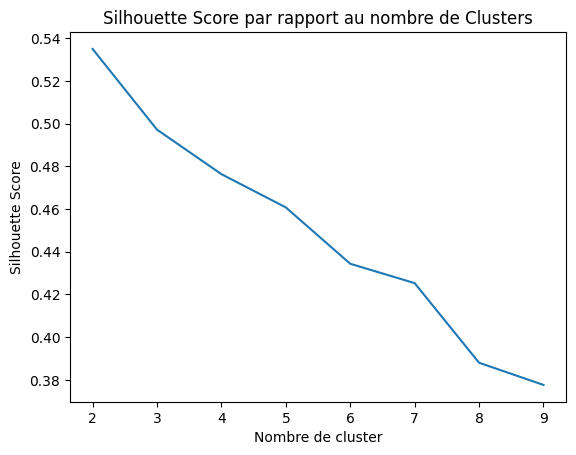

Nombre optimal de clusters selon la silhouette analysis: 2


In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


silhouette_scores = [] #initialise liste pour chaque score des différents nb de clusters
clusters_range = range(2, 10)  # teste 2 à 9 clusters


for n_clusters in clusters_range: #pour chaque nb de cluster
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) #initialise un objet KMeans 
    kmeans.fit(df_train) #apprends "fit"
    silhouette_sc = silhouette_score(df_train, kmeans.labels_) #calcul score de silhouette (mesure à quel point chq pnt est proche de son propre cluster par rapport aux autres clusters) moyen des clusters obtenus
    silhouette_scores.append(silhouette_sc) #ajoute le score à la liste 

plt.plot(clusters_range, silhouette_scores)
plt.title('Silhouette Score par rapport au nombre de Clusters')
plt.xlabel('Nombre de cluster')
plt.ylabel('Silhouette Score')
plt.show()   


n_clusters_optimal = np.argmax(silhouette_scores) + 2  # +2 car on commence à partir de 2 clusters
print("Nombre optimal de clusters selon la silhouette analysis:", n_clusters_optimal)


In [131]:
kmeans = KMeans(n_clusters=n_clusters_optimal, random_state=42) #modèle KMeans avec nb optimal de clusters
df['cluster'] = kmeans.fit_predict(df_train)


      longitude   latitude              clc_quartier              clc_secteur  \
0      3.293264  49.840500  Quartier du Centre-Ville              Quai Gayant   
1      3.273380  49.861409    Quartier du Vermandois               Stade Cepy   
2      3.289068  49.844513  Quartier du Centre-Ville    Rue Villebois Mareuil   
3      3.302387  49.861778      Quartier de l'Europe   Square des Marronniers   
4      3.304047  49.858446      Quartier de l'Europe            Avenue Buffon   
...         ...        ...                       ...                      ...   
7404   3.283505  49.848695  Quartier du Centre-Ville     Place Edouard Branly   
7405   3.283436  49.848682  Quartier du Centre-Ville     Place Edouard Branly   
7406   3.297078  49.860413      Quartier de l'Europe                rue Hertz   
7407   3.291685  49.848009  Quartier du Centre-Ville      Square rue Fréreuse   
7408   3.301788  49.861503      Quartier de l'Europe  square des marronniers    

      haut_tot  haut_tronc 

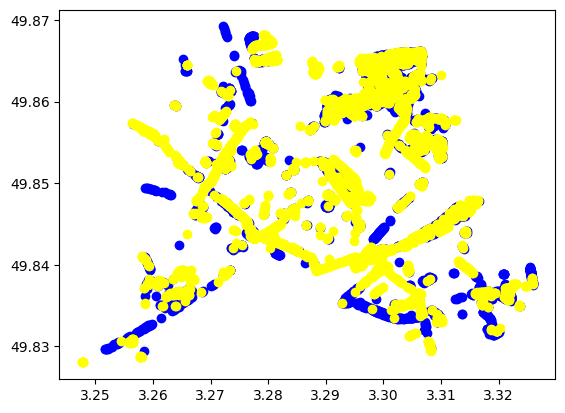

In [132]:
import matplotlib.pyplot as plt


cluster_colors = ['blue', 'yellow'] #couleurs pour les clusters
#print(df)

for cluster in range(n_clusters_optimal):
    cluster_data = df[df['cluster'] == cluster]
    print(cluster_data)
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], color=cluster_colors[cluster])

plt.show()



In [135]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="cluster", 
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, zoom=10, mapbox_style="open-street-map",
                        title="Clusters d'arbres sur la carte")

fig.update_layout(legend=dict(x=0, y=1))
fig.show()

ModuleNotFoundError: No module named 'plotly'